In [33]:
import requests
import json

In [34]:
interested_categories = ["televisions","smartphones"]

In [35]:
res = requests.get("https://www.daraz.com.np/televisions/?ajax=true&page=2")
res

<Response [200]>

In [4]:
print(res.text)

{"mods":{"brandBar":{"tItemType":"nx_brandBar","items":[{"url":"/smartphones/apple/?&from=onesearch_category_3","image":"//static-01.daraz.com.np/original/9593a960fd8c7805479ff31fa0fcc137.jpg","id":"4178"},{"url":"/smartphones/samsung-brand/?&from=onesearch_category_3","image":"//static-01.daraz.com.np/p/f3ba04c06a82ee4f7e7f876fa2ffd1bd.png","id":"4198"},{"url":"/smartphones/realme/?&from=onesearch_category_3","image":"//static-01.daraz.com.np/p/a44b8d515f5698d36c3c09a0f22768f3.png","id":"202391"},{"url":"/smartphones/oneplus_brand/?&from=onesearch_category_3","image":"//static-01.daraz.com.np/original/8ef0eaf0269b7f7cce1840ec45dce67d.jpg","id":"12944"},{"url":"/smartphones/nokia/?&from=onesearch_category_3","image":"//static-01.daraz.com.np/brand/nokia_7c6daa3535a498818b1bd8fb9594c168.jpg","id":"4158"},{"url":"/smartphones/infinix/?&from=onesearch_category_3","image":"//static-01.daraz.com.np/original/31a613d4825ce415688502f82a14454f.jpg","id":"12941"},{"url":"/smartphones/vivo/?&from

In [5]:
data = json.loads(res.text)['mods']['listItems']

In [6]:
# getting data from next page
url = data[1]["productUrl"]
url

'//www.daraz.com.np/products/samsung-galaxy-m32-6gb128gb-ii-64-mp-quad-camera-ii-6000-mah-battery-ii-fhd-samoled-display-i105841199-s1030088419.html?search=1'

In [7]:
p_res = requests.get("http:"+url)
p_res

<Response [200]>

In [8]:
import bs4


<!DOCTYPE HTML>
<html xmlns:wormhole="http://www.w3.org/1999/xhtml"
>
<head>
    
    
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no"/>
    <meta name="aplus-auto-exp" content='[{"filter":"exp-tracking=suggest-official-store","logkey":"/lzdse.result.os_impr","props":["href"],"tag":"a"}]' />
    <meta name="data-spm" content="a2a0e"/>
    <meta name="robots" content="index,follow" />

    <link rel="stylesheet" href="//laz-g-cdn.alicdn.com/lzd/assets/0.0.7/dpl-buyeruikit/2.0.1/next-noreset-1.css">
    <link rel="stylesheet" href="//laz-g-cdn.alicdn.com/lzd/assets/0.0.7/dpl-buyeruikit/2.0.1/next-noreset-2.css">


    <!--[if lte IE 9]><link rel="stylesheet" href="//laz-g-cdn.alicdn.com/lzd/assets/0.0.5/dpl-buyeruikit/1.7.0/next-noreset-2.css" /><![endif]-->
    <link rel="shortcut icon" href="https://laz-img-cdn.alicdn.com/imgextra/i1/O1CN01V8uEDV1jdZ9U2wL90_!!6000000004571-73-tps-64-64.ico"/>

    <script src="//
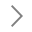

In [9]:
with open("index.html","w") as f:
    f.write(p_res.text)
print(p_res.text)

In [10]:
import re


In [23]:
start = p_res.text.find('app.run({"data":{"root":{"fields":') + len('app.run({"data":{"root":{"fields":')
end = p_res.text.find('"skuTabPath":{}}}}') + len('"skuTabPath":{}}')
start, end

(247542, 276148)

In [26]:
# js_obj = json.loads(p_res.text[start:end])
js_obj = json.loads(p_res.text[start:end]+"}")
js_obj

{'seller': {'chatResponsiveRate': {'labelText': 'Chat Response Rate',
   'value': '100%'},
  'chatUrl': '//pages.daraz.com.np/wow/i/np/im/im-mobile?brandId=4198',
  'hideAllMetrics': False,
  'imEnable': True,
  'imUserId': '8805',
  'imageUrl': 'https://img.alicdn.com/imgextra/i2/O1CN010a9TPg1PvA3DLiKnS_!!6000000001902-2-tps-300-42.png',
  'name': 'Mobile e-Store',
  'newSeller': False,
  'percentRate': '88%',
  'positiveSellerRating': {'labelText': 'Positive Seller Ratings',
   'value': '88%'},
  'rate': 0.88,
  'rateLevel': 3,
  'sellerId': '8800',
  'shipOnTime': {'labelText': 'Ship on Time', 'value': '100%'},
  'shopId': 8942,
  'size': 5,
  'time': 4,
  'type': '4',
  'unit': 'years',
  'url': '//www.daraz.com.np/shop/246impex1621856820/?itemId=105841199&channelSource=pdp'},
 'promotionTags': {'data': {'1030088419': [{'description': 'with min spend of  Rs. 19,999',
     'name': 'Min. spend Rs. 19,999',
     'products': [],
     'title': 'Voucher',
     'type': '1',
     'utKey': 

In [28]:
interested_keys = ["specifications", "disclaimers","review","product", "qna", "warranties", "deliveryOptions"]
new_prod_data = {}
for key in interested_keys:
    new_prod_data[key] = js_obj[key]
new_prod_data

{'specifications': {'1030088419': {'boxContent': 'Hand Set + Adapter + Cable + Ejection Pin 1/1 Pcs',
   'features': {'Brand': 'Samsung',
    'SKU': '105841199_NP-1030088419',
    'Battery Capacity': '6000 - 6999 mAh',
    'Screen Size (inches)': '6.1 - 6.5 Inch',
    'Build Type': 'Plastic',
    'Camera Front (Megapixels)': '20.0 MP',
    'Camera Back (Megapixels)': '64.0 MP + 8.0 MP + 2.0 MP + 2.0 MP',
    'Number Of Cameras': '5',
    'Display Protection': 'Glass',
    'Model Year': '2021',
    'Network Connections': 'GSM',
    'Fast Charging': 'Yes',
    'Wireless Charging': 'No',
    'Number of SIM Slots': '2',
    'PPI': '400-500 PPI',
    'Charger Type': 'Type-C',
    'Flash': 'Yes',
    'Bluetooth Support': 'Yes',
    'Wi-Fi': 'Yes',
    'SIM Type': 'Nano',
    'Removable Battery': 'No',
    'GPS': 'Yes',
    'FM Radio': 'No',
    'NFC': 'No',
    'Fingerprint Sensor': 'Side Mounted',
    'Expandable Storage': 'Yes',
    'Memory Card Slot Type': 'Dedicated',
    'Video Resoluti

In [13]:
new_data = []
interested_keys = ['name',"nid","originalPrice","price","discount","ratingScore",
                   "review", "location", "sellerName","sellerId","restrictedAge",
                  "brandName","brandId","productUrl"]
# including only necessary data
for item in data:
    new_item = {}
    for key in interested_keys:
        new_item[key] = item.get(key,None)
    new_data.append(new_item)

In [14]:
new_data

[{'name': 'Samsung Galaxy F22 / sAMOLED / 6000 mAh',
  'nid': '105875164',
  'originalPrice': None,
  'price': '20499.00',
  'discount': None,
  'ratingScore': '4.92727',
  'review': '55',
  'location': 'Nepal',
  'sellerName': 'Integrated Mobility Solutions Pvt. Ltd.',
  'sellerId': '900151839152',
  'restrictedAge': 0,
  'brandName': 'Samsung',
  'brandId': '4198',
  'productUrl': '//www.daraz.com.np/products/samsung-galaxy-f22-samoled-6000-mah-i105875164-s1027751802.html?search=1'},
 {'name': 'Samsung Galaxy M32 (6GB/128GB) II 64 MP Quad Camera II 6000 mAh Battery II FHD+ SAMOLED Display',
  'nid': '105841199',
  'originalPrice': None,
  'price': '27999.00',
  'discount': None,
  'ratingScore': '4.86364',
  'review': '22',
  'location': 'Nepal',
  'sellerName': '246Impex',
  'sellerId': '8800',
  'restrictedAge': 0,
  'brandName': 'Samsung',
  'brandId': '4198',
  'productUrl': '//www.daraz.com.np/products/samsung-galaxy-m32-6gb128gb-ii-64-mp-quad-camera-ii-6000-mah-battery-ii-fhd-s

In [15]:
with open("test_1.json","w") as f:
    json.dump(json.loads(response.text), f)

NameError: name 'response' is not defined

In [ ]:
curl 'https://www.daraz.com.np/groceries-canned-dry-packaged-food-dried-goods-dried-fruit-nuts/?ajax=true&from=input&page=1&q=nuts' -H 'User-Agent: Mozilla/5.0 (X11; Linux x86_64; rv:98.0) Gecko/20100101 Firefox/98.0' -H 'Accept: */*' -H 'Accept-Language: en-US,en;q=0.5' -H 'Accept-Encoding: gzip, deflate, br' -H 'Content-Type: application/json' -H 'Sec-Fetch-Dest: empty' -H 'Sec-Fetch-Mode: cors' -H 'Sec-Fetch-Site: same-origin' -H 'Referer: https://www.daraz.com.np/groceries-canned-dry-packaged-food-dried-goods-dried-fruit-nuts/?from=input&page=1&q=nuts' -H 'Connection: keep-alive' -H 'Cookie: lzd_cid=80cc3a51-7077-410d-94f0-aa5ad34c19f7; t_uid=80cc3a51-7077-410d-94f0-aa5ad34c19f7; isg=BM7OmiatIEUTGJfsH2oVoAakHK2QT5JJsGVrNPgUblTnW2e1YNwXWaVZkx832Iph; l=eBTOAzhggtHTIbbyBO5Courza779zQOV5kPzaNbMiIncC6jOMbvNoD-Q0vPa0LKRRBXcMxLB4lM3TVJt_FuuJzHIndLHROMsU6DDBef..; tfstk=czflB0ayhA0B5Fy267O7OPwCc_blaFuyVdpVgzqAyrtRao7vusjs3AzTI0t4oSDC.; t_fv=1643198446131; cna=7iV4GnIcYnwCAaM1GZhu8tCD; _ga_GEHLHHEXPG=GS1.1.1652343207.12.1.1652344687.0; _ga=GA1.3.589938297.1643198447; cto_bundle=Z73g119uSkVqQ0MlMkJLdFZPY3hnUWxBbzB3dGd0UnRGcklzTW5RaVhUamQ3WGQzR3JTQlZ1VHJvSUhYS1dPczlrSWNvJTJGTVFjaXdOdVhxZGlPQjN1TSUyQkh2SnBnTW9sZmxvaVZVcXhBTTA4c1VxM2ROeFVrcmNLMEYyTE9neTFtRE0wUSUyQkg0; _bl_uid=Rkk90z2Idw7qCUi5ncnmt10p24R1; glo_holmes_x=%7B%22aff_cid%22%3A%223e9236588647447b9a29c6802a4606ae-1651655665047-01150-_6fSbd%22%2C%22ts%22%3A1651655665047%7D; hng=NP|en-NP|NPR|524; userLanguageML=en-NP; _m_h5_tk=98944d75f46fed710905f3ca2cfa9160_1652350405690; _m_h5_tk_enc=887cf0084dbca3bd3d6bed5f4b544766; _gcl_au=1.1.1224525243.1652244825; _gid=GA1.3.1251663028.1652244826; lzd_sid=191adf5ccd04bd2d776da2a5d3919e30; _tb_token_=e5b37e7031e31; JSESSIONID=F0928C0330F7F9D3C16E84B336753026; XSRF-TOKEN=17322504-b54f-4f73-ab60-150b4698fd04; t_sid=67ReS3JNfbQ1y4Jo863PMqRaXx8nMDq7; utm_channel=NA; xlly_s=1' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: trailers'

# DARAZ nuts price scraper 

In [40]:
import requests 
import json

In [41]:
results = [] 

In [53]:
res = requests.get("https://www.daraz.com.np/groceries-canned-dry-packaged-food-dried-goods-dried-fruit-nuts/?ajax=true&from=input&page=2&q=nuts")
res

<Response [200]>

In [54]:
full_data = json.loads(res.text)
product_data = full_data["mods"]["listItems"]
product_data

[{'name': 'Combo Dry Fruits 4 Kg',
  'nid': '108199637',
  'icons': [],
  'utLogMap': {'x_object_type': 'item',
   'x_item_ids': '108199637',
   'scene_pre': 'search',
   'current_price': '5700.00',
   'x_sku_ids': '1029119701',
   'SN': '271dc49ee3583be7fd15f71a494ce434',
   'x_ad': '1',
   'x_object_id': '108199637'},
  'productUrl': '//www.daraz.com.np/products/combo-dry-fruits-4-kg-i108199637-s1029119701.html?search=1',
  'image': 'https://static-01.daraz.com.np/p/8763896fb638e1f4c8a1d29d179cfadc.jpg',
  'originalPrice': '5800.00',
  'originalPriceShow': 'Rs. 5,800',
  'price': '5700.00',
  'promotionId': 'null',
  'priceShow': 'Rs. 5,700',
  'discount': '-2%',
  'ratingScore': '5',
  'review': '1',
  'installment': '',
  'tItemType': 'nt_product',
  'location': 'Nepal',
  'cheapest_sku': '108199637_NP-1029119701',
  'sku': '108199637_NP',
  'skus': [],
  'description': [],
  'brandId': '39704',
  'brandName': 'No Brand',
  'sellerId': '1004772',
  'mainSellerId': '',
  'sellerName

In [55]:
with open("dryNuts.json", "w") as f:
    json.dump(product_data,f)

In [56]:
# new we need to extract quantity from name field
import re
def quantity_parser(name):
    # normalizing the text
    name = ' '.join(name.split()).lower()
    amount_pattern  = re.compile("([0-9]+ [a-z]+|[0-9]+[a-z]+)")
    find = amount_pattern.search(name)
    amount = find.group(1)

    price_unit = re.compile("([0-9]+)\ ?([a-z]+)")
    find = price_unit.search(amount)
    return {"qty": find.group(1),"qty_unit": find.group(2)}

In [57]:
text = "Bhumi Nepal White Dates Dried-500g"
text2 = "Walnut / Okhar - 1 kg Soft & Organic by Sarga Bazar"
quantity_parser(text), quantity_parser(text2)

({'qty': '500', 'qty_unit': 'g'}, {'qty': '1', 'qty_unit': 'kg'})

In [58]:
def name_parser(name):
    # normalizing the text
    name = ' '.join(name.split()).lower()
    
    hyphen_search = re.compile("-\ ?[0-9]+").search(name)
    hyphen_sub_str = hyphen_search.group() if hyphen_search else ''
    
    hyphen_index = name.find(hyphen_sub_str) 
    
    by_index = name.find("by")
    
    num_search = re.compile("[0-9]+").search(name)
    num_sub_str = num_search.group() if num_search else ''
    
    num_index = name.find(num_sub_str)
    indexes = []
    for num in [hyphen_index, by_index, num_index]:
        if num != -1 and num != 0:
            indexes.append(num)
    
    index = min(indexes) if len(indexes) > 0 else None
    return {"product_name":name[:index].strip()}

In [59]:
text = "Bhumi Nepal White Dates Dried"
text2 = "Walnut / Okhar - 1 kg Soft & Organic by Sarga Bazar"
text3 = "Harlal-s Unique Pisatachios 100 gm"
name_parser(text), name_parser(text2), name_parser(text3)

({'product_name': 'bhumi nepal white dates dried'},
 {'product_name': 'walnut / okhar'},
 {'product_name': 'harlal-s unique pisatachios'})

In [60]:
interested_keys = ["name","nid", "image", "price","ratingScore","review", "location", "brandId","brandName","sellerId","sellerName"]
filtered_product_data = []
for item in product_data:
    filtered_item = {} 
    for key in interested_keys:
        filtered_item[key] = item[key]
        if key == "name":
            name = item[key]
            filtered_item.update(quantity_parser(name))
            filtered_item.update(name_parser(name))
        
    filtered_product_data.append(filtered_item)

In [61]:
filtered_product_data 

[{'name': 'Combo Dry Fruits 4 Kg',
  'qty': '4',
  'qty_unit': 'kg',
  'product_name': 'combo dry fruits',
  'nid': '108199637',
  'image': 'https://static-01.daraz.com.np/p/8763896fb638e1f4c8a1d29d179cfadc.jpg',
  'price': '5700.00',
  'ratingScore': '5',
  'review': '1',
  'location': 'Nepal',
  'brandId': '39704',
  'brandName': 'No Brand',
  'sellerId': '1004772',
  'sellerName': 'GaunGhar Organic Store'},
 {'name': 'Makhana 200g',
  'qty': '200',
  'qty_unit': 'g',
  'product_name': 'makhana',
  'nid': '113377170',
  'image': 'https://static-01.daraz.com.np/p/a359d4912dbafa21bbb16c2962db94df.jpg',
  'price': '220.00',
  'ratingScore': '0',
  'review': '0',
  'location': 'Nepal',
  'brandId': '39704',
  'brandName': 'No Brand',
  'sellerId': '900151197005',
  'sellerName': 'Sant traders'},
 {'name': 'Dried Figs (Angir) 100Gm',
  'qty': '100',
  'qty_unit': 'gm',
  'product_name': 'dried figs (angir)',
  'nid': '101752103',
  'image': 'https://static-01.daraz.com.np/p/7dd2c990bff3f2

In [62]:
len(filtered_product_data)

40

In [63]:
results += filtered_product_data 
len(results)

80

In [66]:
with open("nuts_dataset.json","w") as f:
    json.dump(results, f)

In [68]:
with open("nuts_dataset.json","r") as f:
    data = json.load(f)
len(data)

80

In [69]:
data[5]

{'name': 'Makhana ( Fox Nuts) 250 gm',
 'qty': '250',
 'qty_unit': 'gm',
 'product_name': 'makhana ( fox nuts)',
 'nid': '104414594',
 'image': 'https://static-01.daraz.com.np/p/d028e7dd29fa05755d76886249c94878.jpg',
 'price': '280.00',
 'ratingScore': '4.46154',
 'review': '13',
 'location': 'Nepal',
 'brandId': '39704',
 'brandName': 'No Brand',
 'sellerId': '1004772',
 'sellerName': 'GaunGhar Organic Store'}

In [78]:
# let's see if ndi is unique or not
import pandas as pd

nids = pd.Series([item["nid"] for item in data]).unique()

In [80]:
len(nids), len(data)

(80, 80)

so nids are unique

# Indexing the product

In [109]:
index_file = {}
for item in data:
    index_file[item.pop('nid')] = item

In [110]:
index_file

{'105204965': {'name': 'Dry Apricot ( Khurpani ) - 100 gm',
  'qty': '100',
  'qty_unit': 'gm',
  'product_name': 'dry apricot ( khurpani )',
  'image': 'https://static-01.daraz.com.np/p/4c4490a1b3093d1f99ec426b03f9771e.jpg',
  'price': '100.00',
  'ratingScore': '4.85714',
  'review': '14',
  'location': 'Nepal',
  'brandId': '39704',
  'brandName': 'No Brand',
  'sellerId': '900151992048',
  'sellerName': 'Mother spice center'},
 '105128804': {'name': 'Dried Fig (Anjeer) - 100 gm',
  'qty': '100',
  'qty_unit': 'gm',
  'product_name': 'dried fig (anjeer)',
  'image': 'https://static-01.daraz.com.np/p/730cf7f960e2ea0dd9128b82bf4256d0.jpg',
  'price': '200.00',
  'ratingScore': '4.64706',
  'review': '34',
  'location': 'Nepal',
  'brandId': '39704',
  'brandName': 'No Brand',
  'sellerId': '900151992048',
  'sellerName': 'Mother spice center'},
 '103195811': {'name': 'Almond Nuts (Badam)- 500Gm',
  'qty': '500',
  'qty_unit': 'gm',
  'product_name': 'almond nuts (badam)',
  'image': '

# Building inverted index

In [172]:
import re
corpus = {
    index:re.subn('[\(|\)|\/|&|,]',' ', item["product_name"].lower())[0].split() 
    for index,item in index_file.items()
}
corpus

{'105204965': ['dry', 'apricot', 'khurpani'],
 '105128804': ['dried', 'fig', 'anjeer'],
 '103195811': ['almond', 'nuts', 'badam'],
 '103400009': ['fox', 'nuts', 'makhana'],
 '103191790': ['almond', 'nuts', 'badam'],
 '104414594': ['makhana', 'fox', 'nuts'],
 '103195814': ['almond', 'nuts', 'badam'],
 '113374468': ['apricot', 'khurpani'],
 '103214850': ['cashew', 'nuts', 'kaju'],
 '113672140': ['regular', 'almond', 'deshi', 'badam', 'a', 'grade'],
 '103211849': ['cashew', 'nuts', 'kaju'],
 '104178029': ['walnut'],
 '106457011': ['crown', 'dates', 'wet'],
 '110304829': ['pistachios'],
 '112507612': ['raisins',
  'dry',
  'kismis',
  'lowers',
  'the',
  'risk',
  'of',
  'heart',
  'disease'],
 '103153897': ['resins', 'kismis'],
 '113377167': ['walnut', 'kernels', 'gudi'],
 '105698095': ['bhumi', 'nepal', 'white', 'dates', 'dried'],
 '103158805': ['dry', 'dates', 'white', 'seto', 'chokada'],
 '113371640': ['walnut', 'kernels', 'gudi'],
 '113673118': ['walnuts', 'okhar', 'दाते', 'ओखर', 'g

In [173]:
def clean_list(listt):
    stop_words = "of for a the is and are sale".lower().split()
    noise = "\'s"
    english_word = re.compile("([a-z|A-Z|0-9])+$") 
    new_list = []
    for item in listt:
        if item not in stop_words:
            item = item.replace(noise, "")
            if bool(re.match(english_word, item)): # check if the item is english word or not
                new_list.append(item)
    return new_list

    
prep_corpus = {
   index : clean_list(items) for index,items in corpus.items()
}

In [175]:
prep_corpus

{'105204965': ['dry', 'apricot', 'khurpani'],
 '105128804': ['dried', 'fig', 'anjeer'],
 '103195811': ['almond', 'nuts', 'badam'],
 '103400009': ['fox', 'nuts', 'makhana'],
 '103191790': ['almond', 'nuts', 'badam'],
 '104414594': ['makhana', 'fox', 'nuts'],
 '103195814': ['almond', 'nuts', 'badam'],
 '113374468': ['apricot', 'khurpani'],
 '103214850': ['cashew', 'nuts', 'kaju'],
 '113672140': ['regular', 'almond', 'deshi', 'badam', 'grade'],
 '103211849': ['cashew', 'nuts', 'kaju'],
 '104178029': ['walnut'],
 '106457011': ['crown', 'dates', 'wet'],
 '110304829': ['pistachios'],
 '112507612': ['raisins',
  'dry',
  'kismis',
  'lowers',
  'risk',
  'heart',
  'disease'],
 '103153897': ['resins', 'kismis'],
 '113377167': ['walnut', 'kernels', 'gudi'],
 '105698095': ['bhumi', 'nepal', 'white', 'dates', 'dried'],
 '103158805': ['dry', 'dates', 'white', 'seto', 'chokada'],
 '113371640': ['walnut', 'kernels', 'gudi'],
 '113673118': ['walnuts', 'okhar', 'grade'],
 '103692237': ['harlal', 'uni

In [183]:
from collections import defaultdict
inverted_index = defaultdict(list)

for index,word_list in prep_corpus.items():
    for token in word_list:
        inverted_index[token].append(index)
        
inverted_index

defaultdict(list,
            {'dry': ['105204965',
              '112507612',
              '103158805',
              '113370789',
              '113366979',
              '113380114',
              '111501454',
              '113618879',
              '108199637',
              '106348464',
              '107348198',
              '113380116',
              '104398997',
              '101744159',
              '106310733'],
             'apricot': ['105204965', '113374468'],
             'khurpani': ['105204965', '113374468', '101744159'],
             'dried': ['105128804',
              '105698095',
              '101752103',
              '104154225',
              '105695120'],
             'fig': ['105128804', '113380114'],
             'anjeer': ['105128804', '113380114'],
             'almond': ['103195811',
              '103191790',
              '103195814',
              '113672140',
              '110305800',
              '103192778',
              '105771408',
        

# query filtering
retrieving products that matches the given query string

In [223]:
query = "dry apricot".split()
def intersection(query):
    result = set(inverted_index[query.pop(0)])
    for word in query:
        result = result.intersection(set(inverted_index[word]))
    return result

In [224]:
intersection(query)

{'105204965'}

# generating summary
we store all the possible combination of inverted_index's index

In [ ]:
summary_index = defaultdict(list)
inverted_keys = inverted_index.keys()
for i in range(2,len(inverted_keys)+1):
    for combination in list(combinations(inverted_index,i)):
        summary_index(' '.join(combination)) = intersection(combination)
        

In [266]:
from itertools import combinations

a = {"a":[1,2], "b":[1], "c":[1,2,3,4]}
x = list(a.keys())

list(combinations(x,2))

[('a', 'b'), ('a', 'c'), ('b', 'c')]